In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_df = pd.read_csv('/content/Users.csv', encoding ='ISO-8859-1')
books_df = pd.read_csv('/content/Books.csv', encoding ='ISO-8859-1')
ratings_df = pd.read_csv('/content/Ratings.csv', encoding ='ISO-8859-1')

<ipython-input-2-f9ed0c856ad4>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('/content/Books.csv', encoding ='ISO-8859-1')


In [3]:
# Merging the dataframes in two steps
# First merge users_df and ratings_df
merged_df = pd.merge(users_df, ratings_df, on='User-ID', how='outer')

# Then merge the result with books_df
merged_df = pd.merge(merged_df, books_df, on='ISBN', how='outer')
merged_df

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,89192.0,"goor, alabama, netherlands",34.0,0330299891,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,181817.0,"enschede, overijsel, netherlands",37.0,0330299891,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89192.0,"goor, alabama, netherlands",34.0,0375404120,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,266865.0,"reston, virginia, usa",33.0,0375404120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89192.0,"goor, alabama, netherlands",34.0,0586045007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1324559,278853.0,"stranraer, n/a, united kingdom",17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324560,278855.0,"tacoma, washington, united kingdom",50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324561,278856.0,"brampton, ontario, canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324562,278857.0,"knoxville, tennessee, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EDA (BASIC EXPLORATION)**

In [4]:
# EDA (BASIC EXPLORATION)
merged_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,89192.0,"goor, alabama, netherlands",34.0,0330299891,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,181817.0,"enschede, overijsel, netherlands",37.0,0330299891,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89192.0,"goor, alabama, netherlands",34.0,0375404120,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,266865.0,"reston, virginia, usa",33.0,0375404120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89192.0,"goor, alabama, netherlands",34.0,0586045007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
merged_df.shape

(1324564, 12)

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324564 entries, 0 to 1324563
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1323355 non-null  float64
 1   Location             1323355 non-null  object 
 2   Age                  946277 non-null   float64
 3   ISBN                 1150989 non-null  object 
 4   Book-Rating          1149780 non-null  float64
 5   Book-Title           1032345 non-null  object 
 6   Book-Author          1032343 non-null  object 
 7   Year-Of-Publication  1032345 non-null  object 
 8   Publisher            1032343 non-null  object 
 9   Image-URL-S          1032345 non-null  object 
 10  Image-URL-M          1032345 non-null  object 
 11  Image-URL-L          1032341 non-null  object 
dtypes: float64(3), object(9)
memory usage: 121.3+ MB


In [7]:
# SUMMARY STATISTICS
merged_df.describe()

,User-ID,Age,Book-Rating
count,1.323355e+06,946277.000000,1.149780e+06
mean,1.402573e+05,36.912856,2.866950e+00
std,8.054875e+04,14.273762,3.854184e+00
min,1.000000e+00,0.000000,0.000000e+00
25%,7.022200e+04,28.000000,0.000000e+00
50%,1.407720e+05,35.000000,0.000000e+00
75%,2.107735e+05,45.000000,7.000000e+00
max,2.788580e+05,244.000000,1.000000e+01


In [8]:
# HANDLING MISSING VALUES
merged_df.isnull().sum()

,0
User-ID,1209
Location,1209
Age,378287
ISBN,173575
Book-Rating,174784
Book-Title,292219
Book-Author,292221
Year-Of-Publication,292219
Publisher,292221
Image-URL-S,292219


In [9]:
# Replacing missing values with median in users dataset
users_df['Age'].fillna(users_df['Age'].median(), inplace=True)

# Fill missing 'Book-Rating' with 0 (assuming 0 means no rating given)
merged_df['Book-Rating'].fillna(0, inplace=True)

# Fill missing 'Book-Title', 'Book-Author', 'Year-Of-Publication', and 'Publisher' with 'Unknown'
merged_df['Book-Title'].fillna('Unknown', inplace=True)
merged_df['Book-Author'].fillna('Unknown', inplace=True)
merged_df['Year-Of-Publication'].fillna('Unknown', inplace=True)
merged_df['Publisher'].fillna('Unknown', inplace=True)

<ipython-input-9-507ee4d2e324>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df['Age'].fillna(users_df['Age'].median(), inplace=True)
<ipython-input-9-507ee4d2e324>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [10]:
print("\nAfter filling missing values:")
merged_df.isnull().sum()


After filling missing values:


,0
User-ID,1209
Location,1209
Age,378287
ISBN,173575
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,292219


In [11]:
# OUTLIER DETECTION USING IQR
# Select numerical columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns

def detect_outliers_iqr(data, columns):
    outliers_summary = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers_summary[column] = len(outliers)
    return outliers_summary

# Detect outliers in the merged DataFrame
outliers_count = detect_outliers_iqr(merged_df, numerical_columns)

# Print the number of outliers for each numerical column
for column, count in outliers_count.items():
    print(f'Column {column} has {count} outliers.')

Column User-ID has 0 outliers.
Column Age has 11458 outliers.
Column Book-Rating has 0 outliers.


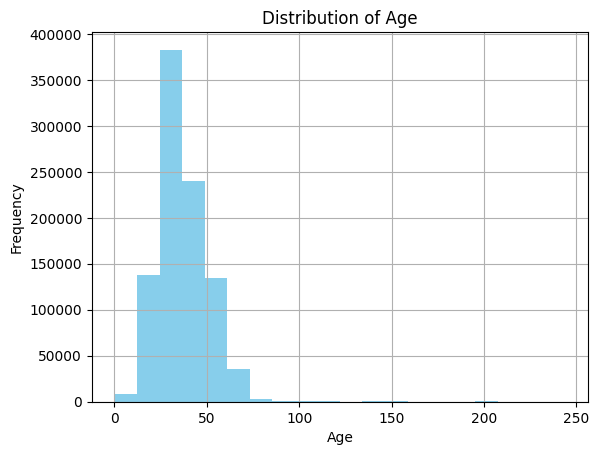

In [12]:
# DATA VISUALIZATION ON MERGED DATAFRAME

# HiISTOGRAM
merged_df['Age'].hist(bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

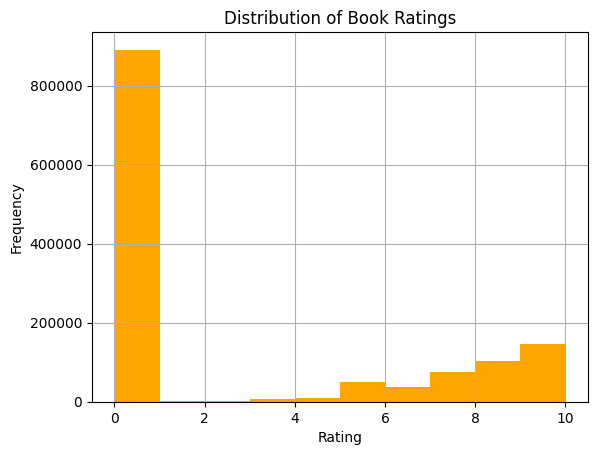

In [13]:
# Book-Rating Distribution (Ratings)

merged_df['Book-Rating'].hist(bins=10, color='orange')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-76b727b97352>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')


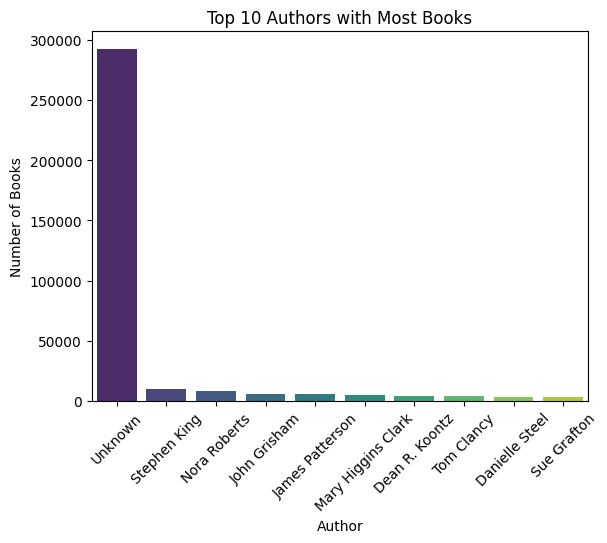

In [14]:
# BAR CHATS
# Comparing the categories of Discrete Data
# Top 10 Authors with Most Books
top_authors = merged_df['Book-Author'].value_counts().head(10)

sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

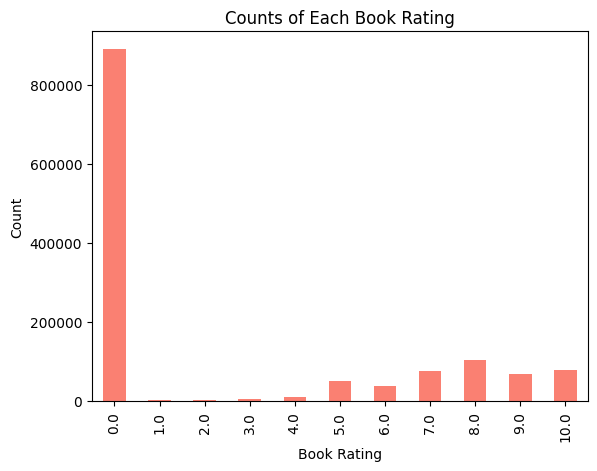

In [15]:
# Count of Each Book Rating

merged_df['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Counts of Each Book Rating')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

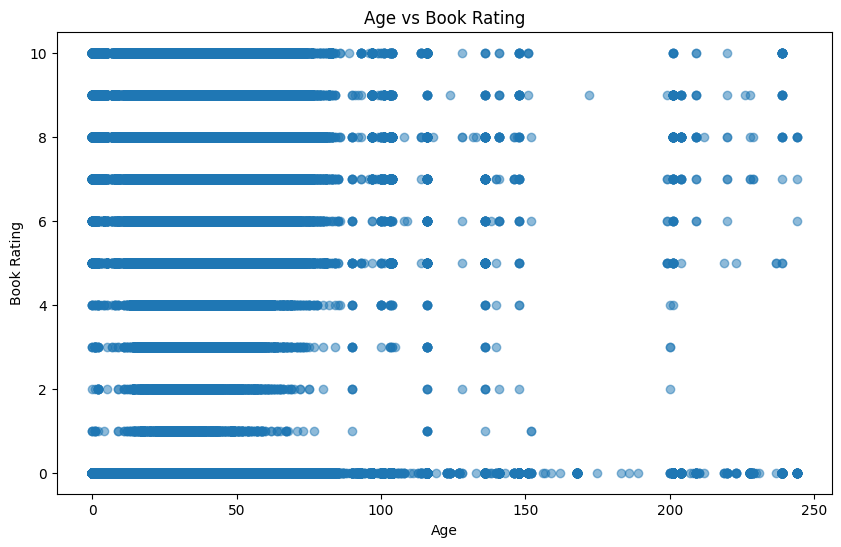

In [16]:
# SCATTER PLOT
# Age VS Book-rating

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['Book-Rating'], alpha=0.5)
plt.title('Age vs Book Rating')
plt.xlabel('Age')
plt.ylabel('Book Rating')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

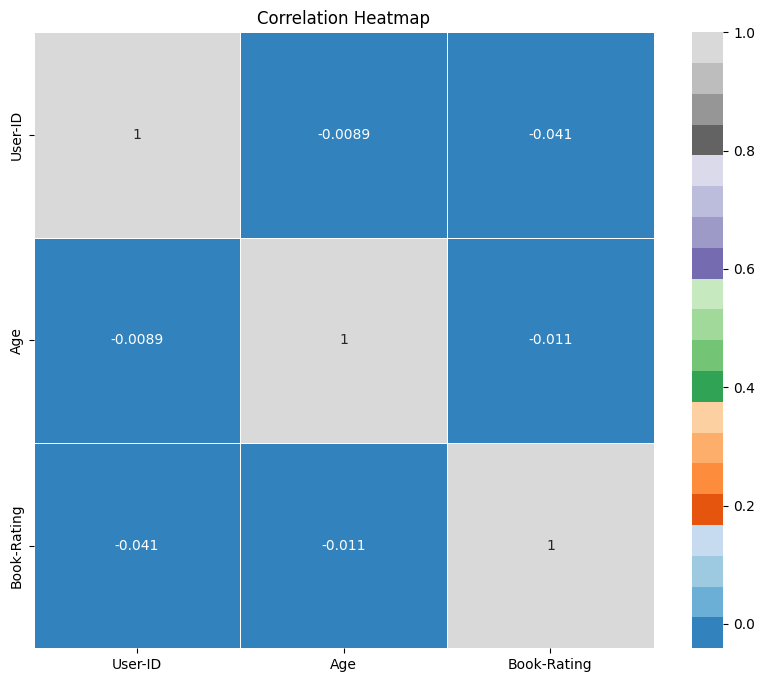

In [17]:
# HEATMAP

numerical_columns = merged_df.select_dtypes(include=['number']).columns

correlation_matrix = merged_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='tab20c', linewidths=0.5)
plt.title('Correlation Heatmap')

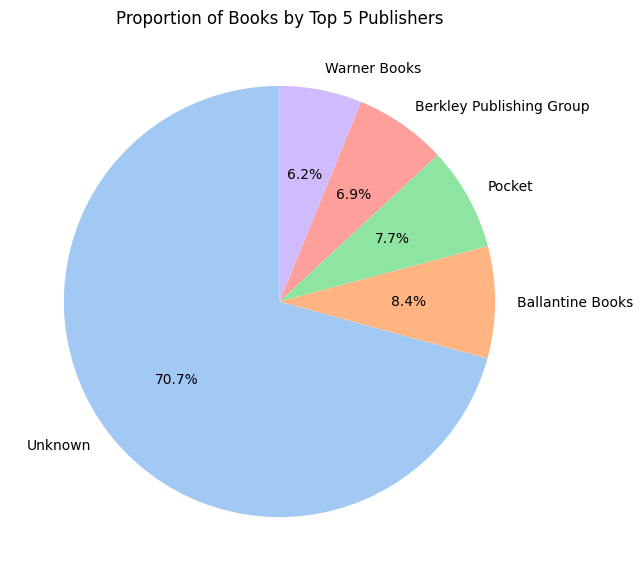

In [18]:
# PIE CHART
# Proportion of Books by Top 5 Publishers

top_publishers = merged_df['Publisher'].value_counts().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Books by Top 5 Publishers')
plt.show()

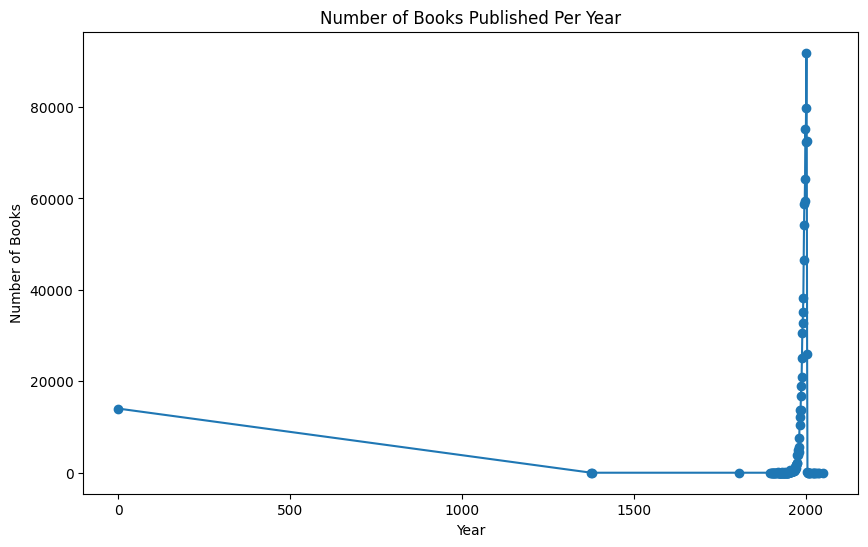

In [19]:
# LINE PLOT
# To show the trend over time
# Number of Books Published Per Year

# Convert 'Year-Of-Publication' to numeric, handling errors
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')

# Drop rows with missing 'Year-Of-Publication' after conversion
merged_df = merged_df.dropna(subset=['Year-Of-Publication'])

books_per_year = merged_df['Year-Of-Publication'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-')
plt.title('Number of Books Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

<ipython-input-20-f83721251988>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', data=users_df, palette='pastel')


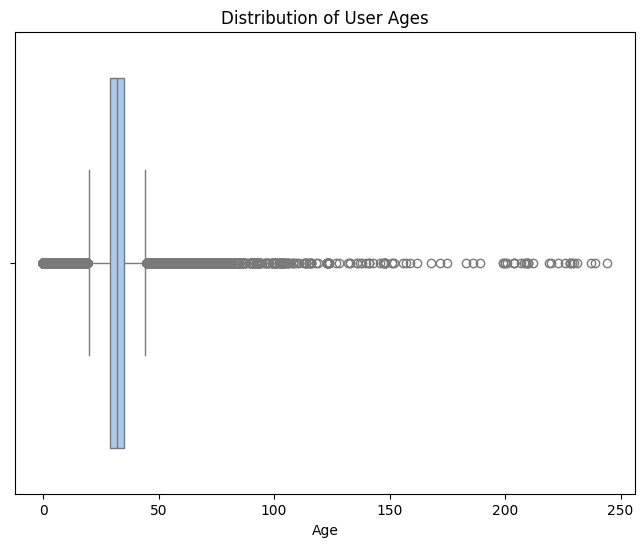

In [20]:
# BOXPLOT
# Distribution of user Ages

plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=users_df, palette='pastel')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.show()

<ipython-input-21-8e7f0b252c71>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year-Of-Publication', data=books_df, palette='pastel')


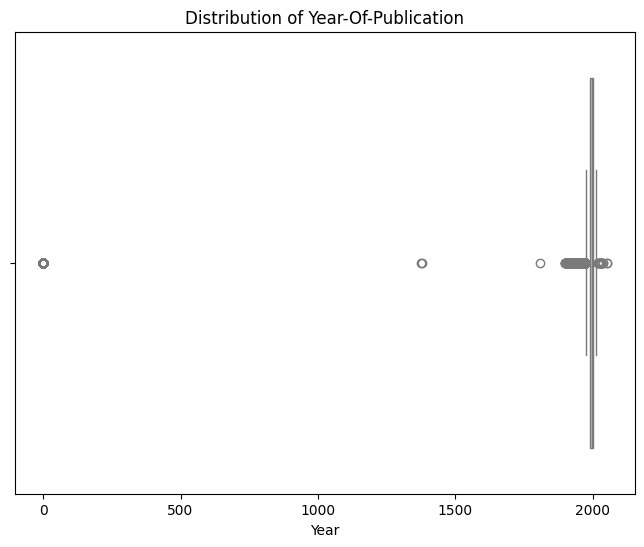

In [21]:
# Distribution of Year-Of-Publication

# Convert 'Year-Of-Publication' to numeric, handling errors
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Year-Of-Publication', data=books_df, palette='pastel')
plt.title('Distribution of Year-Of-Publication')
plt.xlabel('Year')
plt.show()

<ipython-input-22-d6609efc16e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Book-Rating', data=merged_df, palette='pastel')


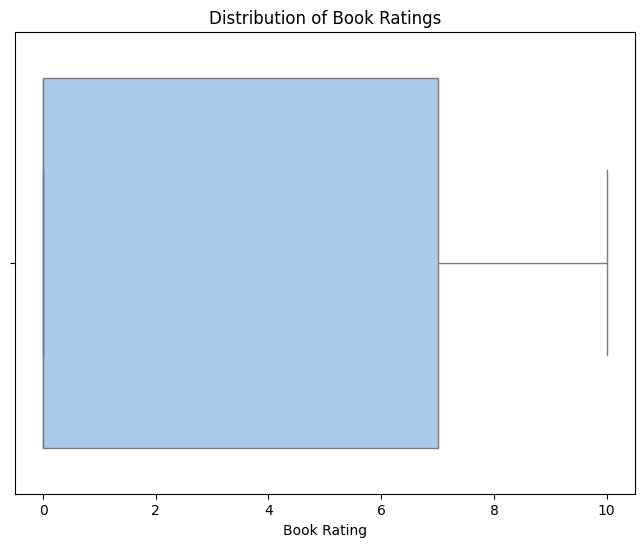

In [22]:
# Distribution of Book Ratings

plt.figure(figsize=(8, 6))
sns.boxplot(x='Book-Rating', data=merged_df, palette='pastel')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.show()

# **MODEL BUILDING**

In [23]:
# 1. Popularity based recommendation system
# 2. Collaborative filtering based recommendation system

In [24]:
# 1. POPULARITY BASED RECOMMENDER SYSTEM

# Displaying the top 50 books with highest average rating. (Considering only those books which have gotten a minimum of 250 votes)

ratings_with_name = ratings_df.merge(books_df, on='ISBN')

num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [25]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'}, inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [26]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [27]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)
popular_df = popular_df.merge(books_df, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-M', 'num_ratings', 'avg_ratings']]

In [28]:
popular_df

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [29]:
# COLLABORATIVE FILTERING BASED RECOMMENDATION SYSYTEM. (Considering only those user's ratings who have rated more than 200 books )

x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_rated = x[x].index
users_rated

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [30]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(users_rated)]

y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [31]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [34]:
def recommend(book_name):
  # index fetch
  index = np.where(pt.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse=True)[1:6]

  for i in similar_items:
    print(pt.index[i[0]])

In [35]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [36]:
recommend('Animal Farm')

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Midnight
Second Nature
Call of the Wild


In [37]:
recommend('1st to Die: A Novel')

Along Came a Spider (Alex Cross Novels)
Roses Are Red (Alex Cross Novels)
Pop Goes the Weasel
Violets Are Blue
Lightning


In [38]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [39]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [ ]:
# DEPLOYMENT

In [47]:
pip install streamlit

In [48]:
import streamlit as st
import pandas as pd
import numpy as np

# Streamlit App
st.title("Book Recommendation System")

book_name = st.text_input("Enter a Book Title")

if st.button("Get Recommendations"):
    if book_name:
        recommendations = recommend(book_name)
        st.subheader("Recommended Books:")
        for book in recommendations:
            st.write(book)

2024-11-18 07:27:30.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 07:27:30.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar